In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from videoData import VideoData

In [3]:
from rawCam import RawCam
from vmemMap import VmemMap
from apdMap import APDMap
from phaseMapHilbert import PhaseMapHilbert as PhaseMap
from phaseVarianceMap import PhaseVarianceMap

In [8]:
path = "/mnt/Jalife/ExperimentData/20161019-2/C001H001S0005/"
cam_type = "sa4"
image_width = 512
image_height = 512
frame_start = 0 
frame_end = 500 # end frame (-1:all)

In [9]:
showFrame = 230

In [10]:
cam = RawCam(
    path,cam_type,
    image_width, image_height,
    frame_start, frame_end
)

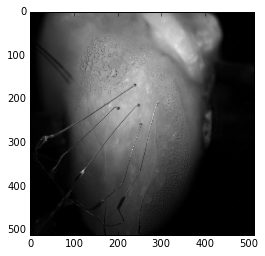

In [11]:
cam.showFrame(showFrame)

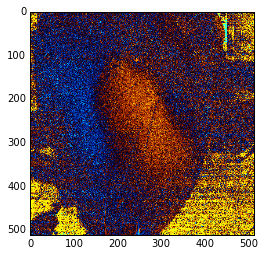

In [12]:
vmem = VmemMap(cam)
vmem.showFrame(showFrame)

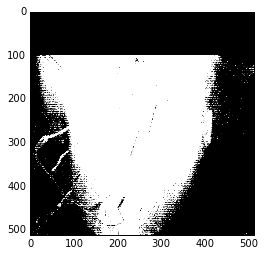

In [13]:

vmem.setDiffRange(diff_min=60, diff_max=300)

vmem.setRectROI(top=100)

vmem.showROI()

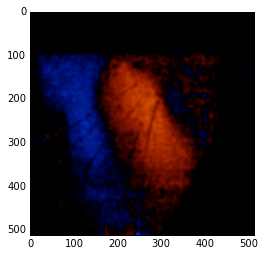

In [19]:
vmem.smooth(3)
vmem.showFrame(showFrame)

In [15]:
from f_pixel import f_pixel_apd, f_pixel_updown


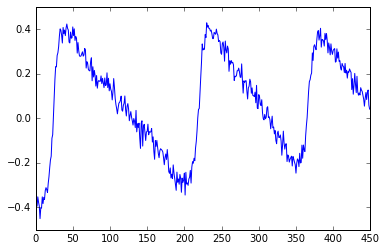

In [20]:

ts = vmem.data[50:, 128, 128]
plt.plot(ts)

In [21]:
max_beats=10;thre_type='const';thre_up=0.8;thre_down=0.6

f_pixel_updown(ts, thre_type, thre_up, thre_down)

([29, 224, 372], [108, 296, 442])

In [22]:
X = f_pixel_apd(ts, max_beats, thre_type, thre_up, thre_down)
X

array([ 79.,  72.,  70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

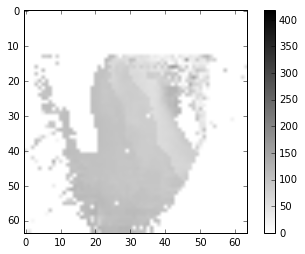

In [24]:
apd = APDMap(vmem, width=64, max_beats=10)
apd.showFrame(2)
plt.colorbar()

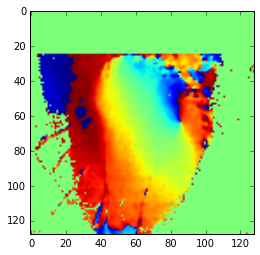

In [25]:

pmap = PhaseMap(vmem)
pmap.showFrame(showFrame)

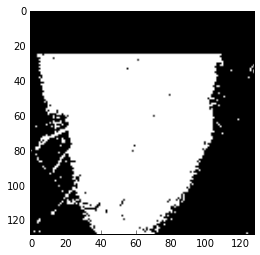

In [26]:
pmap.showROI()

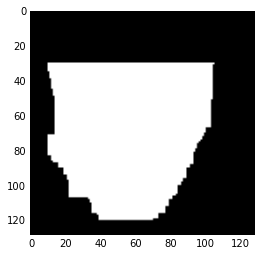

In [27]:
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)
pmap.showROI()

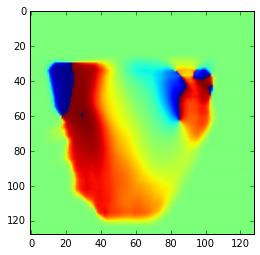

In [28]:

pmap.smooth(size=9)
pmap.showFrame(showFrame)

In [30]:

from phaseMapFTDT import PhaseMapFTDT

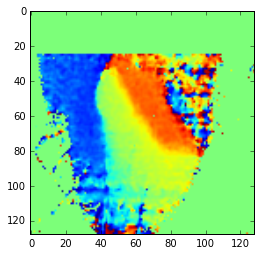

In [31]:
pmap_ftdt = PhaseMapFTDT(vmem, v_mean = -0.0, dt = 30)
pmap_ftdt.showFrame(showFrame)

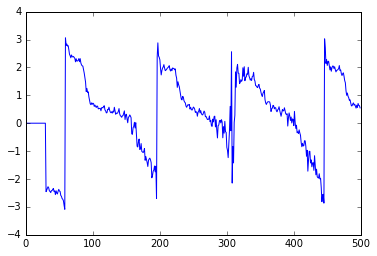

In [32]:
plt.plot(pmap_ftdt.data[:,64,64])

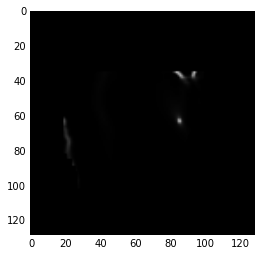

In [34]:

pvmap = PhaseVarianceMap(pmap, size=3)
pvmap.morphROI(erosion=9)
pvmap.showFrame(showFrame)